# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
# Code Here
!pip install palmerpenguins

import sklearn
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins

penguins = load_penguins()



In [3]:
penguins = penguins.dropna(subset=['bill_depth_mm'])

print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007  


In [4]:
y = penguins[['bill_depth_mm']]
x = penguins[["species","island","bill_length_mm","flipper_length_mm", "body_mass_g", "sex", "year"]]
categorical_var = ["species","island", "sex"]
numeric_var = ["bil_length","flipper_length_mm", "body_mass_g","year"]

x = pd.get_dummies(x, columns=categorical_var)
x.head()

,bill_length_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,190.0,3650.0,2007,True,False,False,False,False,True,False,True


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

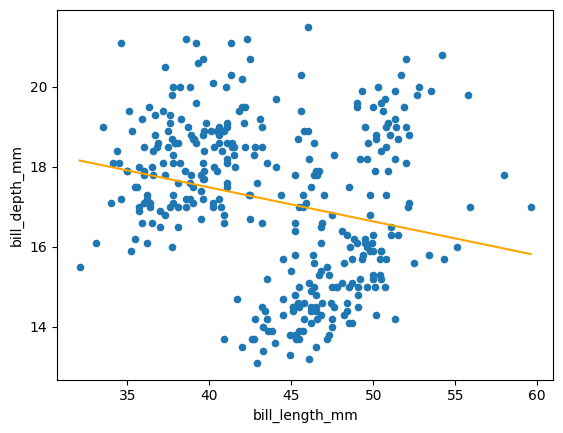

In [8]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X=penguins[["bill_length_mm"]], y=penguins["bill_depth_mm"])
lr_model.coef_,lr_model.intercept_

X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(penguins["bill_length_mm"].min(), penguins["bill_length_mm"].max(), num=1000)
y_new_ = pd.Series(
    lr_model.predict(X_new),
    index=X_new["bill_length_mm"]
)
penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange");

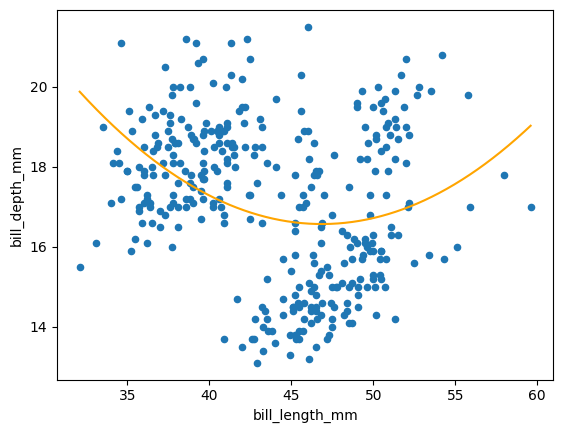

In [11]:
#Quadratic
penguins["bill_length_sq"] = penguins["bill_length_mm"]**2

q_model = LinearRegression()
q_model.fit(X=penguins[["bill_length_mm","bill_length_sq"]], y=penguins["bill_depth_mm"])
q_model.coef_,q_model.intercept_

X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(penguins["bill_length_mm"].min(), penguins["bill_length_mm"].max(), num=1000)
X_new["bill_length_sq"] = X_new["bill_length_mm"]**2

y_new_ = pd.Series(
    q_model.predict(X_new),
    index=X_new["bill_length_mm"]
)
penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange");

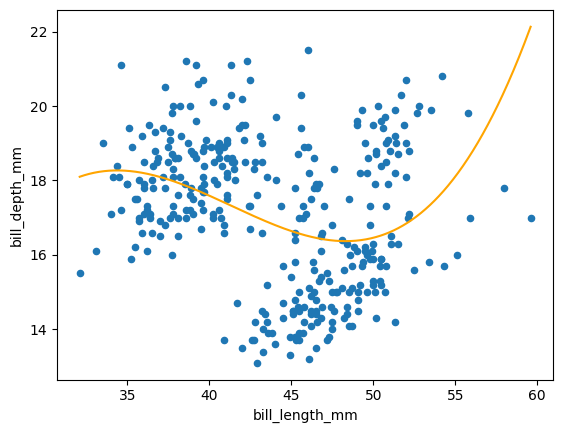

In [16]:
#Cubic
penguins["bill_length_cu"] = penguins["bill_length_mm"]**3

cube_model = LinearRegression()
cube_model.fit(X=penguins[["bill_length_mm","bill_length_sq","bill_length_cu"]], y=penguins["bill_depth_mm"])
cube_model.coef_,cube_model.intercept_

X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(penguins["bill_length_mm"].min(), penguins["bill_length_mm"].max(), num=1000)
X_new["bill_length_sq"] = X_new["bill_length_mm"]**2
X_new["bill_length_cu"] = X_new["bill_length_mm"]**3

y_new_ = pd.Series(
    cube_model.predict(X_new),
    index=X_new["bill_length_mm"]
)
penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange");

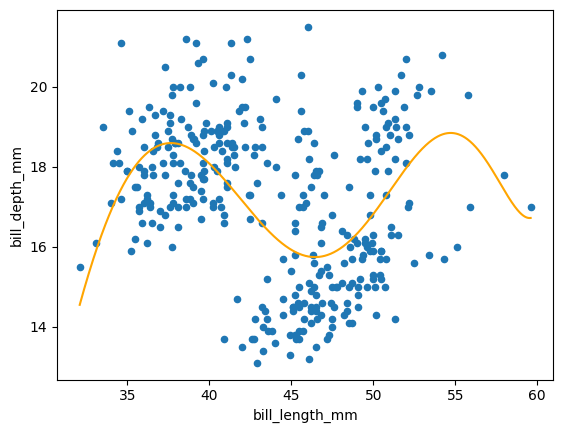

In [26]:
#10 Degree Polynomial
poly10 = LinearRegression()

for i in range(2, 11):
    penguins[f"bill_length_{i}"] = penguins["bill_length_mm"]**i

poly10.fit(
    X=penguins[["bill_length_mm", "bill_length_2", "bill_length_3", "bill_length_4", "bill_length_5",
                "bill_length_6", "bill_length_7", "bill_length_8", "bill_length_9", "bill_length_10"]],
    y=penguins["bill_depth_mm"]
)
poly10.coef_, poly10.intercept_

X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(penguins["bill_length_mm"].min(), penguins["bill_length_mm"].max(), num=1000)

for i in range(2, 11):
    X_new[f"bill_length_{i}"] = X_new["bill_length_mm"] ** i


y_new_ = pd.Series(
    poly10.predict(X_new),
    index=X_new["bill_length_mm"]
)
penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange");

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

1. The linear model seems to underfit the data, with the straight line being unable to capture all teh data

2. The cubic and 10 degree polynomail seems to overfit the data, as it follows all the variations of data. Capturing the noise.

3. The quadratic seems to fit the data the best, as it captures the general trend.